<a href="https://colab.research.google.com/github/ImanFakury/imanRepository/blob/master/DeepLearning%5CCHW2%5CDL_HW2_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning Course**

## **Loss Functions and Multilayer Perceptrons (MLP)**

---

### **Student Information:**

- **Name:** *(Iman Alizadeh Fakouri)*
- **Student Number:** *(401102134)*

---

### **Assignment Overview**

In this notebook, we will explore various loss functions used in neural networks, with a specific focus on their role in training **Multilayer Perceptrons (MLPs)**. By the end of this notebook, you will have a deeper understanding of:
- Types of loss functions
- How loss functions affect the training process
- The relationship between loss functions and model optimization in MLPs

---

### **Table of Contents**

1. Introduction to Loss Functions
2. Types of Loss Functions
3. Multilayer Perceptrons (MLP)
4. Implementing Loss Functions in MLP
5. Conclusion

---



# 1.Introduction to Loss Functions

In deep learning, **loss functions** play a crucial role in training models by quantifying the difference between the predicted outputs and the actual targets. Selecting the appropriate loss function is essential for the success of your model. In this assay, we will explore various loss functions available in PyTorch, understand their theoretical backgrounds, and provide you with a scaffolded class to experiment with these loss functions.

Before begining, let's train a simle MLP model using the **L1Loss** function. We'll return to this model later to experiment with different loss functions. We'll start by importing the necessary libraries and defining the model architecture.

First things first, let's talk about **L1Loss**.

### 1. L1Loss (`torch.nn.L1Loss`)
- **Description:** Also known as Mean Absolute Error (MAE), L1Loss computes the average absolute difference between the predicted values and the target values.
- **Use Case:** Suitable for regression tasks where robustness to outliers is desired.

Here is the mathematical formulation of L1Loss:
\begin{equation}
\text{L1Loss} = \frac{1}{n} \sum_{i=1}^{n} |y_{\text{pred}_i} - y_{\text{true}_i}|
\end{equation}

Let's implement a simple MLP model using the L1Loss function.

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from torch.optim import Adam
from tqdm import tqdm
# Don't be courious about Adam, it's just a fancy name for a fancy optimization algorithm

Here, we'll define a class called `SimpleMLP` that inherits from `nn.Module`. This class can have multiple layers, and we'll use the `nn.Sequential` module to define the layers of the model. The model will have the following architecture:

In [12]:
class SimpleMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_hidden_layers=1, last_layer_activation_fn=nn.ReLU):
        super(SimpleMLP, self).__init__()

        layers = []
        layers.append(nn.Linear(input_dim, hidden_dim))
        for x in range(num_hidden_layers - 1):
            layers.append(nn.ReLU())
            layers.append(nn.Linear(hidden_dim, hidden_dim))
        layers.append(last_layer_activation_fn())
        layers.append(nn.Linear(hidden_dim, output_dim))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)


Now, let's define a class called `SimpleMLP_Loss` that has the following architecture:

In [13]:
from tqdm import tqdm

class SimpleMLPTrainer:
    def __init__(self, model, criterion, optimizer):
        self.model = model
        self.criterion = criterion
        self.optimizer = optimizer

    def train(self, train_loader, num_epochs):
        training_losses = []
        for epoch in range(num_epochs):
            self.model.train()
            epoch_loss = 0.0
            for inputs, targets in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
                self.optimizer.zero_grad()
                outputs = self.model(inputs)
                loss = self.criterion(outputs, targets)
                loss.backward()
                self.optimizer.step()
                epoch_loss += loss.item()
            avg_loss = epoch_loss / len(train_loader)
            training_losses.append(epoch_loss / len(train_loader))
            print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")
        return training_losses



    def evaluate(self, val_loader):
        self.model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, targets in val_loader:
                outputs = self.model(inputs)
                loss = self.criterion(outputs, targets)
                val_loss += loss.item()
                predicted = (outputs > 0.5).float()
                correct += (predicted == targets).sum().item()
                total += targets.size(0)
        avg_val_loss = val_loss / len(val_loader)
        accuracy = correct / total * 100
        return avg_val_loss, accuracy


Next, lets test our model using the L1Loss function. You'll use <span style="color:red">*Titanic Dataset*</span> to train the model.


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load Titanic dataset
train_url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(train_url)
data = data[['Pclass', 'Sex', 'Age', 'Fare', 'Survived']].dropna()
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
X = data[['Pclass', 'Sex', 'Age', 'Fare']].values
y = data['Survived'].values
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)


<div style="text-align: center;"> <span style="color:red; font-size: 26px; font-weight: bold;">Let's train!</span> </div>

In [20]:
from torch.nn import L1Loss
model = SimpleMLP(X_train.shape[1], 64, 1, num_hidden_layers=2)
criterion = L1Loss()
optimizer = Adam(model.parameters(), lr=0.001)
trainer = SimpleMLPTrainer(model, criterion, optimizer)
training_losses = trainer.train(train_loader, 20)
val_loss, accuracy = trainer.evaluate(val_loader)
print(f"Validation Loss: {val_loss:.4f}, Accuracy: {accuracy:.2f}%")

Epoch 1/20: 100%|██████████| 18/18 [00:00<00:00, 272.91it/s]


Epoch 1, Loss: 0.3927


Epoch 2/20: 100%|██████████| 18/18 [00:00<00:00, 292.18it/s]


Epoch 2, Loss: 0.2908


Epoch 3/20: 100%|██████████| 18/18 [00:00<00:00, 357.09it/s]


Epoch 3, Loss: 0.2468


Epoch 4/20: 100%|██████████| 18/18 [00:00<00:00, 323.05it/s]


Epoch 4, Loss: 0.2286


Epoch 5/20: 100%|██████████| 18/18 [00:00<00:00, 346.41it/s]


Epoch 5, Loss: 0.2200


Epoch 6/20: 100%|██████████| 18/18 [00:00<00:00, 321.97it/s]


Epoch 6, Loss: 0.2168


Epoch 7/20: 100%|██████████| 18/18 [00:00<00:00, 335.69it/s]


Epoch 7, Loss: 0.2163


Epoch 8/20: 100%|██████████| 18/18 [00:00<00:00, 213.72it/s]


Epoch 8, Loss: 0.2122


Epoch 9/20: 100%|██████████| 18/18 [00:00<00:00, 279.87it/s]


Epoch 9, Loss: 0.2122


Epoch 10/20: 100%|██████████| 18/18 [00:00<00:00, 183.38it/s]

Epoch 10, Loss: 0.2080

Epoch 11/20: 100%|██████████| 18/18 [00:00<00:00, 325.40it/s]


Epoch 11, Loss: 0.2107


Epoch 12/20: 100%|██████████| 18/18 [00:00<00:00, 312.59it/s]


Epoch 12, Loss: 0.2055


Epoch 13/20: 100%|██████████| 18/18 [00:00<00:00, 377.11it/s]


Epoch 13, Loss: 0.2037


Epoch 14/20: 100%|██████████| 18/18 [00:00<00:00, 350.90it/s]


Epoch 14, Loss: 0.2021


Epoch 15/20: 100%|██████████| 18/18 [00:00<00:00, 301.85it/s]


Epoch 15, Loss: 0.1996


Epoch 16/20: 100%|██████████| 18/18 [00:00<00:00, 359.97it/s]


Epoch 16, Loss: 0.1996


Epoch 17/20: 100%|██████████| 18/18 [00:00<00:00, 333.31it/s]


Epoch 17, Loss: 0.1978


Epoch 18/20: 100%|██████████| 18/18 [00:00<00:00, 385.48it/s]


Epoch 18, Loss: 0.1980


Epoch 19/20: 100%|██████████| 18/18 [00:00<00:00, 387.66it/s]


Epoch 19, Loss: 0.1946


Epoch 20/20: 100%|██████████| 18/18 [00:00<00:00, 388.57it/s]

Epoch 20, Loss: 0.1939
Validation Loss: 0.2464, Accuracy: 74.13%


---
# 2. Types of Loss Functions

PyTorch offers a variety of built-in loss functions tailored for different types of problems, such as regression, classification, and more. Below, we discuss several commonly used loss functions, their theoretical foundations, and typical use cases.

### 2. MSELoss (`torch.nn.MSELoss`)
- **Description:** Mean Squared Error (MSE) calculates the average of the squares of the differences between predicted and target values.
- **Use Case:** Commonly used in regression problems where larger errors are significantly penalized.

Here is boring math stuff for MSE:
\begin{equation}
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^{2}
\end{equation}

<span style="color:red; font-size: 18px; font-weight: bold;">Warning:</span> Don't forget to reinitialize the model before experimenting with different loss functions.

In [18]:
from torch.nn import MSELoss
model = SimpleMLP(X_train.shape[1], 64, 1, num_hidden_layers=2)
criterion = MSELoss()
optimizer = Adam(model.parameters(), lr=0.001)
trainer = SimpleMLPTrainer(model, criterion, optimizer)
training_losses = trainer.train(train_loader, 20)
val_loss, accuracy = trainer.evaluate(val_loader)
print(f"Validation Loss (MSE): {val_loss:.4f}, Accuracy: {accuracy:.2f}%")

Epoch 1/20: 100%|██████████| 18/18 [00:00<00:00, 189.67it/s]


Epoch 1, Loss: 0.2207


Epoch 2/20: 100%|██████████| 18/18 [00:00<00:00, 367.73it/s]


Epoch 2, Loss: 0.1464


Epoch 3/20: 100%|██████████| 18/18 [00:00<00:00, 292.71it/s]


Epoch 3, Loss: 0.1346


Epoch 4/20: 100%|██████████| 18/18 [00:00<00:00, 337.07it/s]


Epoch 4, Loss: 0.1318


Epoch 5/20: 100%|██████████| 18/18 [00:00<00:00, 288.90it/s]


Epoch 5, Loss: 0.1307


Epoch 6/20: 100%|██████████| 18/18 [00:00<00:00, 311.34it/s]


Epoch 6, Loss: 0.1295


Epoch 7/20: 100%|██████████| 18/18 [00:00<00:00, 149.63it/s]


Epoch 7, Loss: 0.1284


Epoch 8/20: 100%|██████████| 18/18 [00:00<00:00, 193.90it/s]


Epoch 8, Loss: 0.1286


Epoch 9/20: 100%|██████████| 18/18 [00:00<00:00, 353.13it/s]


Epoch 9, Loss: 0.1297


Epoch 10/20: 100%|██████████| 18/18 [00:00<00:00, 208.86it/s]


Epoch 10, Loss: 0.1279


Epoch 11/20: 100%|██████████| 18/18 [00:00<00:00, 367.71it/s]


Epoch 11, Loss: 0.1249


Epoch 12/20: 100%|██████████| 18/18 [00:00<00:00, 161.51it/s]


Epoch 12, Loss: 0.1222


Epoch 13/20: 100%|██████████| 18/18 [00:00<00:00, 116.08it/s]


Epoch 13, Loss: 0.1228


Epoch 14/20: 100%|██████████| 18/18 [00:00<00:00, 72.71it/s]


Epoch 14, Loss: 0.1216


Epoch 15/20: 100%|██████████| 18/18 [00:00<00:00, 147.94it/s]


Epoch 15, Loss: 0.1202


Epoch 16/20: 100%|██████████| 18/18 [00:00<00:00, 173.73it/s]


Epoch 16, Loss: 0.1199


Epoch 17/20: 100%|██████████| 18/18 [00:00<00:00, 342.22it/s]


Epoch 17, Loss: 0.1192


Epoch 18/20: 100%|██████████| 18/18 [00:00<00:00, 305.60it/s]


Epoch 18, Loss: 0.1181


Epoch 19/20: 100%|██████████| 18/18 [00:00<00:00, 239.39it/s]


Epoch 19, Loss: 0.1190


Epoch 20/20: 100%|██████████| 18/18 [00:00<00:00, 343.83it/s]

Epoch 20, Loss: 0.1174
Validation Loss (MSE): 0.1493, Accuracy: 77.62%


### 3. NLLLoss (`torch.nn.NLLLoss`)
- **Description:** Negative Log-Likelihood Loss measures the likelihood of the target class under the predicted probability distribution.
- **Use Case:** Typically used in multi-class classification tasks, especially when combined with `log_softmax` activation.

Here is the mathematical formulation of NLLLoss:
\begin{equation}
\text{NLLLoss} = -\frac{1}{n} \sum_{i=1}^{n} \log(y_{i})
\end{equation}

I hope you note the logarithm in the formula. It's important!

Why?

In this part, run your training with Relu at last layer. <span style="color:red; font-weight: bold;">Discuss </span> and explain the difference between the results of the two models. Find a proper solution to the problem.


In [28]:
from torch.nn import NLLLoss
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm import tqdm

class SimpleMLPTrainer:
    def __init__(self, model, criterion, optimizer):
        self.model = model
        self.criterion = criterion
        self.optimizer = optimizer

    def train(self, train_loader, num_epochs):
        training_losses = []
        for epoch in range(num_epochs):
            self.model.train()
            epoch_loss = 0.0
            for inputs, targets in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
                targets = targets.squeeze().long()
                self.optimizer.zero_grad()
                outputs = self.model(inputs)
                loss = self.criterion(outputs, targets)
                loss.backward()
                self.optimizer.step()
                epoch_loss += loss.item()
            avg_loss = epoch_loss / len(train_loader)
            training_losses.append(avg_loss)
            print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")
        return training_losses

    def evaluate(self, val_loader):
        self.model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, targets in val_loader:
                targets = targets.squeeze().long()
                outputs = self.model(inputs)
                loss = self.criterion(outputs, targets)
                val_loss += loss.item()
                predicted = torch.argmax(outputs, dim=1)
                correct += (predicted == targets).sum().item()
                total += targets.size(0)
        avg_val_loss = val_loss / len(val_loader)
        accuracy = correct / total * 100
        return avg_val_loss, accuracy



class ReLUWithLogSoftmax(SimpleMLP):
    def __init__(self, input_dim, hidden_dim, output_dim, num_hidden_layers=2):
        super(ReLUWithLogSoftmax, self).__init__(input_dim, hidden_dim, output_dim, num_hidden_layers, last_layer_activation_fn=nn.ReLU)
        self.model = nn.Sequential(
            *list(self.model.children())[:-1],
            nn.LogSoftmax(dim=1)
        )

model_relu = ReLUWithLogSoftmax(X_train.shape[1], 64, 2, num_hidden_layers=2)
criterion_relu = NLLLoss()
optimizer_relu = optim.Adam(model_relu.parameters(), lr=0.001)

trainer_relu = SimpleMLPTrainer(model_relu, criterion_relu, optimizer_relu)
training_losses_relu = trainer_relu.train(train_loader, 20)
val_loss_relu, accuracy_relu = trainer_relu.evaluate(val_loader)
print(f"ReLU + LogSoftmax - Validation Loss: {val_loss_relu:.4f}, Accuracy: {accuracy_relu:.2f}%")


Epoch 1/20: 100%|██████████| 18/18 [00:00<00:00, 387.03it/s]


Epoch 1, Loss: 4.0934


Epoch 2/20: 100%|██████████| 18/18 [00:00<00:00, 395.39it/s]


Epoch 2, Loss: 3.7364


Epoch 3/20: 100%|██████████| 18/18 [00:00<00:00, 416.04it/s]


Epoch 3, Loss: 3.3360


Epoch 4/20: 100%|██████████| 18/18 [00:00<00:00, 337.77it/s]


Epoch 4, Loss: 2.9320


Epoch 5/20: 100%|██████████| 18/18 [00:00<00:00, 360.49it/s]


Epoch 5, Loss: 2.5197


Epoch 6/20: 100%|██████████| 18/18 [00:00<00:00, 366.71it/s]


Epoch 6, Loss: 2.1054


Epoch 7/20: 100%|██████████| 18/18 [00:00<00:00, 416.42it/s]


Epoch 7, Loss: 1.7130


Epoch 8/20: 100%|██████████| 18/18 [00:00<00:00, 422.73it/s]


Epoch 8, Loss: 1.3683


Epoch 9/20: 100%|██████████| 18/18 [00:00<00:00, 407.03it/s]


Epoch 9, Loss: 1.0959


Epoch 10/20: 100%|██████████| 18/18 [00:00<00:00, 419.44it/s]


Epoch 10, Loss: 0.8984


Epoch 11/20: 100%|██████████| 18/18 [00:00<00:00, 396.87it/s]


Epoch 11, Loss: 0.7669


Epoch 12/20: 100%|██████████| 18/18 [00:00<00:00, 396.81it/s]


Epoch 12, Loss: 0.6825


Epoch 13/20: 100%|██████████| 18/18 [00:00<00:00, 407.30it/s]


Epoch 13, Loss: 0.6223


Epoch 14/20: 100%|██████████| 18/18 [00:00<00:00, 361.75it/s]


Epoch 14, Loss: 0.5825


Epoch 15/20: 100%|██████████| 18/18 [00:00<00:00, 349.44it/s]


Epoch 15, Loss: 0.5530


Epoch 16/20: 100%|██████████| 18/18 [00:00<00:00, 314.21it/s]


Epoch 16, Loss: 0.5315


Epoch 17/20: 100%|██████████| 18/18 [00:00<00:00, 340.62it/s]


Epoch 17, Loss: 0.5154


Epoch 18/20: 100%|██████████| 18/18 [00:00<00:00, 434.02it/s]


Epoch 18, Loss: 0.5017


Epoch 19/20: 100%|██████████| 18/18 [00:00<00:00, 407.85it/s]


Epoch 19, Loss: 0.4885


Epoch 20/20: 100%|██████████| 18/18 [00:00<00:00, 310.74it/s]


Epoch 20, Loss: 0.4805
ReLU + LogSoftmax - Validation Loss: 0.5416, Accuracy: 75.52%


In [31]:
# Second Model: LogSoftmax Only
class LogSoftmaxMLP(SimpleMLP):
    def __init__(self, input_dim, hidden_dim, output_dim, num_hidden_layers=2):
        super(LogSoftmaxMLP, self).__init__(input_dim, hidden_dim, output_dim, num_hidden_layers)
        self.model = nn.Sequential(
            *list(self.model.children())[:-1],
            nn.LogSoftmax(dim=1)
        )

model_logsoftmax = LogSoftmaxMLP(X_train.shape[1], 64, 2, num_hidden_layers=2)
criterion_logsoftmax = NLLLoss()
optimizer_logsoftmax = optim.Adam(model_logsoftmax.parameters(), lr=0.001)

trainer_logsoftmax = SimpleMLPTrainer(model_logsoftmax, criterion_logsoftmax, optimizer_logsoftmax)
training_losses_logsoftmax = trainer_logsoftmax.train(train_loader, 10)
val_loss_logsoftmax, accuracy_logsoftmax = trainer_logsoftmax.evaluate(val_loader)
print(f"LogSoftmax Only - Validation Loss: {val_loss_logsoftmax:.4f}, Accuracy: {accuracy_logsoftmax:.2f}%")


Epoch 1/10: 100%|██████████| 18/18 [00:00<00:00, 128.96it/s]


Epoch 1, Loss: 4.1656


Epoch 2/10: 100%|██████████| 18/18 [00:00<00:00, 206.31it/s]


Epoch 2, Loss: 3.9200


Epoch 3/10: 100%|██████████| 18/18 [00:00<00:00, 438.79it/s]


Epoch 3, Loss: 3.5668


Epoch 4/10: 100%|██████████| 18/18 [00:00<00:00, 181.33it/s]


Epoch 4, Loss: 3.1069


Epoch 5/10: 100%|██████████| 18/18 [00:00<00:00, 378.95it/s]


Epoch 5, Loss: 2.6500


Epoch 6/10: 100%|██████████| 18/18 [00:00<00:00, 381.18it/s]


Epoch 6, Loss: 2.2048


Epoch 7/10: 100%|██████████| 18/18 [00:00<00:00, 375.45it/s]


Epoch 7, Loss: 1.7895


Epoch 8/10: 100%|██████████| 18/18 [00:00<00:00, 422.48it/s]


Epoch 8, Loss: 1.4287


Epoch 9/10: 100%|██████████| 18/18 [00:00<00:00, 291.17it/s]


Epoch 9, Loss: 1.1497


Epoch 10/10: 100%|██████████| 18/18 [00:00<00:00, 394.54it/s]


Epoch 10, Loss: 0.9468
LogSoftmax Only - Validation Loss: 0.9045, Accuracy: 74.83%


Your reason for your choice:

<div>

Softmax converts logits into a valid probability distribution, essential for multi-class classification tasks.

NLLLoss requires log-probabilities as input. Using softmax (or log_softmax) ensures this compatibility, whereas ReLU does not.


</div>


### 4. CrossEntropyLoss (`torch.nn.CrossEntropyLoss`)
- **Description:** Combines `LogSoftmax` and `NLLLoss` in one single class. It computes the cross-entropy loss between the target and the output logits.
- **Use Case:** Widely used for multi-class classification problems.

The mathematical formulation of CrossEntropyLoss is as follows:
\begin{equation}
  \text{CrossEntropy}(y, \hat{y}) = - \sum_{i=1}^{C} y_i \log\left(\frac{e^{\hat{y}_i}}{\sum_{j=1}^{C} e^{\hat{y}_j}}\right)
\end{equation}
  where:
  - \( C \) is the number of classes,
  - \( y_i \) is a one-hot encoded target vector (or a scalar class label),
  - \( \hat{y}_i \) represents the logits (unnormalized model outputs) for each class.
  
  In practice, `torch.nn.CrossEntropyLoss` expects raw logits as input and internally applies the softmax function to convert the logits into probabilities, followed by the negative log-likelihood computation.

- **Background:** Cross-entropy measures the difference between the true distribution \( y \) and the predicted distribution \( \hat{y} \). The function minimizes the negative log-probability assigned to the correct class, effectively penalizing predictions that deviate from the true class, making it a standard choice for classification tasks in deep learning.

Now, let's implement a class called `SimpleMLP_Loss` that has the following architecture:


In [36]:
from torch.nn import CrossEntropyLoss

class SimpleMLP_Loss(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_hidden_layers=2):
        super(SimpleMLP_Loss, self).__init__()
        layers = []
        layers.append(nn.Linear(input_dim, hidden_dim))
        layers.append(nn.ReLU())
        for x in range(num_hidden_layers - 1):
            layers.append(nn.Linear(hidden_dim, hidden_dim))
            layers.append(nn.ReLU())

        layers.append(nn.Linear(hidden_dim, output_dim))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)
class SimpleMLPTrainer:
    def __init__(self, model, criterion, optimizer):
        self.model = model
        self.criterion = criterion
        self.optimizer = optimizer

    def train(self, train_loader, num_epochs):
        training_losses = []
        for epoch in range(num_epochs):
            self.model.train()
            epoch_loss = 0.0
            for inputs, targets in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
                self.optimizer.zero_grad()
                outputs = self.model(inputs)
                targets = targets.squeeze().long()
                loss = self.criterion(outputs, targets)
                loss.backward()
                self.optimizer.step()
                epoch_loss += loss.item()
            avg_loss = epoch_loss / len(train_loader)
            training_losses.append(avg_loss)
            print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")
        return training_losses

    def evaluate(self, val_loader):
        self.model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, targets in val_loader:
                outputs = self.model(inputs)
                targets = targets.squeeze().long()
                loss = self.criterion(outputs, targets)
                val_loss += loss.item()
                predicted = torch.argmax(outputs, dim=1)
                correct += (predicted == targets).sum().item()
                total += targets.size(0)
        avg_val_loss = val_loss / len(val_loader)
        accuracy = correct / total * 100
        return avg_val_loss, accuracy


model_loss = SimpleMLP_Loss(input_dim=X_train.shape[1], hidden_dim=64, output_dim=2, num_hidden_layers=2)
criterion_loss = CrossEntropyLoss()
optimizer_loss = optim.Adam(model_loss.parameters(), lr=0.001)
trainer_loss = SimpleMLPTrainer(model_loss, criterion_loss, optimizer_loss)
training_losses_loss = trainer_loss.train(train_loader, 20)
val_loss_loss, accuracy_loss = trainer_loss.evaluate(val_loader)
print(f"CrossEntropyLoss - Validation Loss: {val_loss_loss:.4f}, Accuracy: {accuracy_loss:.2f}%")


Epoch 1/20: 100%|██████████| 18/18 [00:00<00:00, 349.50it/s]


Epoch 1, Loss: 0.6261


Epoch 2/20: 100%|██████████| 18/18 [00:00<00:00, 333.82it/s]


Epoch 2, Loss: 0.5067


Epoch 3/20: 100%|██████████| 18/18 [00:00<00:00, 308.75it/s]


Epoch 3, Loss: 0.4463


Epoch 4/20: 100%|██████████| 18/18 [00:00<00:00, 375.74it/s]


Epoch 4, Loss: 0.4325


Epoch 5/20: 100%|██████████| 18/18 [00:00<00:00, 348.33it/s]


Epoch 5, Loss: 0.4239


Epoch 6/20: 100%|██████████| 18/18 [00:00<00:00, 328.95it/s]


Epoch 6, Loss: 0.4140


Epoch 7/20: 100%|██████████| 18/18 [00:00<00:00, 370.89it/s]


Epoch 7, Loss: 0.4134


Epoch 8/20: 100%|██████████| 18/18 [00:00<00:00, 376.17it/s]


Epoch 8, Loss: 0.4082


Epoch 9/20: 100%|██████████| 18/18 [00:00<00:00, 378.19it/s]


Epoch 9, Loss: 0.4058


Epoch 10/20: 100%|██████████| 18/18 [00:00<00:00, 297.07it/s]


Epoch 10, Loss: 0.4025


Epoch 11/20: 100%|██████████| 18/18 [00:00<00:00, 317.35it/s]


Epoch 11, Loss: 0.4057


Epoch 12/20: 100%|██████████| 18/18 [00:00<00:00, 274.00it/s]


Epoch 12, Loss: 0.4063


Epoch 13/20: 100%|██████████| 18/18 [00:00<00:00, 299.66it/s]


Epoch 13, Loss: 0.4000


Epoch 14/20: 100%|██████████| 18/18 [00:00<00:00, 313.65it/s]


Epoch 14, Loss: 0.3971


Epoch 15/20: 100%|██████████| 18/18 [00:00<00:00, 220.05it/s]


Epoch 15, Loss: 0.3975


Epoch 16/20: 100%|██████████| 18/18 [00:00<00:00, 329.11it/s]


Epoch 16, Loss: 0.3920


Epoch 17/20: 100%|██████████| 18/18 [00:00<00:00, 349.55it/s]


Epoch 17, Loss: 0.3946


Epoch 18/20: 100%|██████████| 18/18 [00:00<00:00, 356.22it/s]


Epoch 18, Loss: 0.3916


Epoch 19/20: 100%|██████████| 18/18 [00:00<00:00, 304.33it/s]


Epoch 19, Loss: 0.3896


Epoch 20/20: 100%|██████████| 18/18 [00:00<00:00, 387.65it/s]

Epoch 20, Loss: 0.3885
CrossEntropyLoss - Validation Loss: 0.4755, Accuracy: 76.22%



### 5. KLDivLoss (`torch.nn.KLDivLoss`)
- **Description:** Kullback-Leibler Divergence Loss measures how one probability distribution diverges from a second, reference distribution. Unlike other loss functions that focus on classification, KL divergence specifically compares the relative entropy between two distributions. It quantifies the information loss when using the predicted distribution to approximate the true distribution.

- **Mathematical Function:**
\begin{equation}
  \text{KL}(P \parallel Q) = \sum_{i=1}^{C} P(i) \left( \log P(i) - \log Q(i) \right)
\end{equation}
  where:
  - \( P \) is the target (true) probability distribution,
  - \( Q \) is the predicted distribution (often the output of `log_softmax`),
  - \( C \) is the number of classes.

  KL divergence is always non-negative, and it equals zero if the two distributions are identical. The loss function expects the model's output to be in the form of log-probabilities (using `log_softmax`) and compares this against a target probability distribution, which is typically a normalized distribution (using softmax).

- **Use Case:** KLDivLoss is frequently used in:
  - **Variational Autoencoders (VAEs):** In VAEs, KL divergence is used to measure how much the learned latent space distribution deviates from a prior distribution (often Gaussian).
  - **Knowledge Distillation:** In teacher-student models, KL divergence is used to transfer the "soft" knowledge from a teacher model to a student model by comparing their output probability distributions.
  - **Reinforcement Learning:** It can be used to update policies while minimizing the divergence from a previous policy.

- **Background:** Kullback-Leibler divergence, a core concept in information theory, measures the inefficiency of assuming the predicted distribution \( Q \) when the true distribution is \( P \). It is asymmetric, meaning that \( KL(P \parallel Q) \neq KL(Q \parallel P) \), so the direction of the comparison matters.

Again, in this part, run your training with Relu at last layer. <span style="color:red; font-weight: bold;">Discuss </span> and explain the difference between the results of the two models. Find a proper solution to the problem.


### 6. CosineEmbeddingLoss (`torch.nn.CosineEmbeddingLoss`)
- **Description:** Measures the cosine similarity between two input tensors, `x1` and `x2`, and computes the loss based on a label `y` that indicates whether the tensors should be similar (`y = 1`) or dissimilar (`y = -1`). Cosine similarity focuses on the angle between vectors, disregarding their magnitude.

- **Mathematical Function:**
\begin{equation}
  \text{CosineEmbeddingLoss}(x1, x2, y) =
  \begin{cases}
  1 - \cos(x_1, x_2), & \text{if } y = 1 \\
  \max(0, \cos(x_1, x_2) - \text{margin}), & \text{if } y = -1
  \end{cases}
\end{equation}
  where $ \cos(x_1, x_2) $ is the cosine similarity between the two vectors, and `margin` is a threshold that determines how dissimilar the vectors should be.

- **Use Case:** Commonly used in tasks like face verification, image similarity, and other scenarios where the relative orientation of vectors (angle) is more important than their length, such as in embeddings and metric learning.

- **Background:** Cosine similarity compares the directional alignment of vectors, making it ideal for high-dimensional data where the magnitude may not be as informative. This loss is particularly useful when training models to learn meaningful embeddings that capture semantic similarity.

You'll become more fimiliar with this loss function in future.

---

# Regularization in Machine Learning

## Introduction

Regularization is a fundamental technique in machine learning that helps prevent overfitting by adding a penalty to the loss function. This penalty discourages the model from becoming too complex, ensuring better generalization to unseen data. In this notebook, you will explore the concepts of regularization, understand different types of regularization techniques, and apply them using Python's popular libraries.

## What is Regularization?

Regularization involves adding a regularization term to the loss function used to train machine learning models. This term imposes a constraint on the model's coefficients, effectively reducing their magnitude. By doing so, regularization helps in:

- **Preventing Overfitting:** Ensures the model does not become too tailored to the training data.
- **Improving Generalization:** Enhances the model's performance on new, unseen data.
- **Feature Selection:** Especially in L1 regularization, it can drive some coefficients to zero, effectively selecting important features.

## Types of Regularization

There are several types of regularization techniques, each imposing different constraints on the model's parameters:

### 1. L1 Regularization (Lasso)

L1 regularization adds the absolute value of the magnitude of coefficients as a penalty term to the loss function. It can lead to sparse models where some feature coefficients are exactly zero.

### 2. L2 Regularization (Ridge)

L2 regularization adds the squared magnitude of coefficients as a penalty term to the loss function. It tends to shrink the coefficients evenly but does not set them to zero.

### 3. Elastic Net

Elastic Net combines both L1 and L2 regularization penalties. It balances the benefits of both Lasso and Ridge methods, allowing for feature selection and coefficient shrinkage.

## Homework Time!
Import Iris dataset from sklearn.datasets and apply ridge regression with different alpha values. Then, create a gif that shows the changes of the classification boundary with respect to alpha values.

Import the libs that you need and start coding!

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from PIL import Image
from io import BytesIO
import imageio
import warnings


# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

Load the Iris dataset and select Setosa and Versicolor classes

In [52]:
# 1. Load and Prepare the Iris Dataset
iris = load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Select only two classes for binary classification (Setosa and Versicolor)
X = X[y != 2]
y = y[y != 2]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Define Function to Plot Decision Boundary

In [53]:
def plot_decision_boundary(model, X, y, alpha):
   # Define the grid (use meshgrid)
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict over the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Create a figure
    fig, ax = plt.subplots(figsize=(6, 5))
    ax.contourf(xx, yy, Z, alpha=0.3, levels=[-0.1, 0.1, 1.1], colors=['blue', 'red'])

    # Scatter plot of the training data
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=50)

    # Title and labels
    ax.set_title(f'RidgeClassifier Decision Boundary (alpha={alpha})')
    ax.set_xlabel('Sepal Length (standardized)')
    ax.set_ylabel('Petal Length (standardized)')

    # Remove axes for clarity
    ax.set_xticks([])
    ax.set_yticks([])

    # Tight layout
    plt.tight_layout()

    # Save the plot to a BytesIO object
    buf = BytesIO()
    plt.savefig(buf, format='png')
    plt.close(fig)
    buf.seek(0)
    return Image.open(buf)

Train MLP with Varying Alpha Values and Collect Images

In [56]:
def plot_decision_boundary(model, X, y, alpha):
    # Create a mesh grid to plot the decision boundaries
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict over the entire mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=50, cmap=plt.cm.RdYlBu)
    plt.title(f"Decision Boundary for MLP (alpha = {alpha:.4f})")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # Return the current figure
    img_path = f"temp_{alpha}.png"
    plt.savefig(img_path)
    plt.close()

    return Image.open(img_path)

# Define a function to create the decision boundary GIF
def create_decision_boundary_gif(alpha_values, X_train, y_train):
    # List to store images
    images = []

    for alpha in alpha_values:
        print(f"Processing alpha={alpha:.4f}")

        # Initialize and train the MLP classifier with the current alpha
        model = MLPClassifier(alpha=alpha, max_iter=500, hidden_layer_sizes=(64, 64), activation='relu')
        model.fit(X_train, y_train)

        # Plot decision boundary and get the image
        img = plot_decision_boundary(model, X_train, y_train, alpha)
        images.append(img)

    # Save the images as a GIF
    gif_filename = 'mlp_classification_boundaries.gif'
    images[0].save(
        gif_filename,
        save_all=True,
        append_images=images[1:],
        duration=500,
        loop=0
    )

    print(f"GIF saved as '{gif_filename}'")
    return gif_filename


Processing alpha=0.0001
Processing alpha=0.0003
Processing alpha=0.0007
Processing alpha=0.0018
Processing alpha=0.0048
Processing alpha=0.0127
Processing alpha=0.0336
Processing alpha=0.0886
Processing alpha=0.2336
Processing alpha=0.6158
Processing alpha=1.6238
Processing alpha=4.2813
Processing alpha=11.2884
Processing alpha=29.7635
Processing alpha=78.4760
Processing alpha=206.9138
Processing alpha=545.5595
Processing alpha=1438.4499
Processing alpha=3792.6902
Processing alpha=10000.0000
GIF saved as 'mlp_classification_boundaries.gif'


## RUN

In [57]:
# Generate alpha values
alpha_values = np.logspace(-4, 4, 20)

# Create the decision boundary GIF
gif_filename = create_decision_boundary_gif(alpha_values, X_train, y_train)

# Open and show the GIF image
gif_image = Image.open(gif_filename)
gif_image.show()


Processing alpha=0.0001
Processing alpha=0.0003
Processing alpha=0.0007
Processing alpha=0.0018
Processing alpha=0.0048
Processing alpha=0.0127
Processing alpha=0.0336
Processing alpha=0.0886
Processing alpha=0.2336
Processing alpha=0.6158
Processing alpha=1.6238
Processing alpha=4.2813
Processing alpha=11.2884
Processing alpha=29.7635
Processing alpha=78.4760
Processing alpha=206.9138
Processing alpha=545.5595
Processing alpha=1438.4499
Processing alpha=3792.6902
Processing alpha=10000.0000
GIF saved as 'mlp_classification_boundaries.gif'


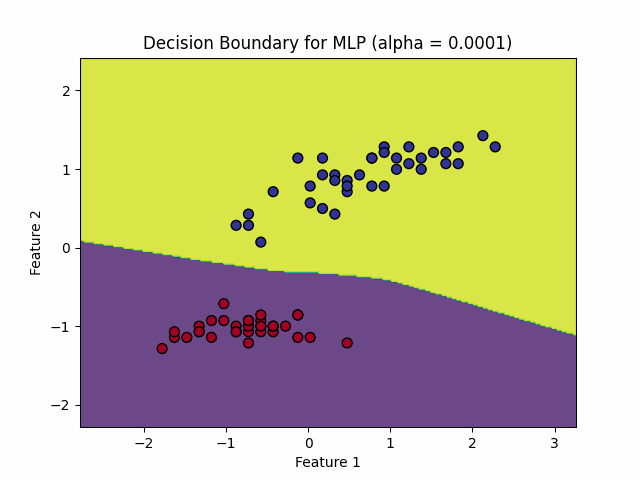

In [58]:
from IPython.display import Image

# Display the GIF
Image(filename='/content/mlp_classification_boundaries.gif')


Your gif should look like this:

<div style="text-align: center;">

### **Multilayer Perceptron Classification Boundaries**

![Classification Boundaries](mlp_classification_boundaries.gif)

*Figure 1: Demonstration of classification boundaries created by a Multilayer Perceptron (MLP) model.*

</div>

